## Machine Learning - Session 2 -  Data Exploration and Data Manipulation

## Part 1 - Data Exploration

In [1]:
# Set the working directory
import os
os.chdir("C:\\Users\\ROONASHREE\\Box Sync\\DataScience\\Python")

#Read the cars.csv data
import pandas as pd
cars = pd.read_csv("cars.csv")

In [2]:
cars.head(1)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US


#### 1. Summaries and Aggregates

In [3]:
#A. The describe() method
cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
# Taking out mean of individual columns/feature
cars.MPG.mean()

23.051231527093602

In [10]:
# Mean of several columns
cars[["MPG","Weight","Origin"]].mean()

# Check the output for "Origin", its a categorial data so no mean, try mode of ita

MPG         23.051232
Weight    2979.413793
dtype: float64

In [14]:
cars["Origin"].mode()
#cars["Origin"].median()

0    US
dtype: object

In [15]:
cars[["MPG","Weight","Origin"]].sum()

MPG                                                  9358.8
Weight                                              1209642
Origin    USUSUSUSUSUSUSUSUSUSEuropeUSUSUSUSUSUSUSUSUSJa...
dtype: object

In [16]:
cars.mean()

MPG               23.051232
Cylinders          5.475369
Displacement     194.779557
Horsepower       103.529557
Weight          2979.413793
Acceleration      15.519704
Model             75.921182
dtype: float64

In [8]:
#Groupby
cars[["MPG","Weight","Origin"]].groupby(["Origin"]).mean()

,MPG,Weight
Origin,,
Europe,26.745205,2431.493151
Japan,30.450633,2221.227848
US,19.688189,3372.700787


In [42]:
cars[["Weight","Horsepower"]].groupby(["Horsepower"]).mean()

,Weight
Horsepower,
0,2502.666667
46,1892.500000
48,2095.750000
49,1867.000000
52,1949.750000
...,...
210,4382.000000
215,4554.000000
220,4354.000000


In [18]:
cars.loc[cars.Cylinders==4,].mean()

MPG               28.862319
Cylinders          4.000000
Displacement     109.900966
Horsepower        76.574879
Weight          2312.685990
Acceleration      16.616425
Model             77.028986
dtype: float64

In [36]:
cars.loc[cars.Weight < 2500]

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
20,Toyota Corolla Mark ii,24.0,4,113.0,95,2372,15.0,70,Japan
24,Datsun PL510,27.0,4,97.0,88,2130,14.5,70,Japan
25,Volkswagen 1131 Deluxe Sedan,26.0,4,97.0,46,1835,20.5,70,Europe
27,Audi 100 LS,24.0,4,107.0,90,2430,14.5,70,Europe
28,Saab 99e,25.0,4,104.0,95,2375,17.5,70,Europe
...,...,...,...,...,...,...,...,...,...
392,Honda Civic (auto),32.0,4,91.0,67,1965,15.7,82,Japan
393,Datsun 310 GX,38.0,4,91.0,67,1995,16.2,82,Japan
399,Dodge Charger 2.2,36.0,4,135.0,84,2370,13.0,82,US
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe


In [31]:
cars[["Weight","Cylinders"]].groupby(["Cylinders"]).max()

,Weight
Cylinders,
3,2720
4,3270
5,3530
6,3907
8,5140


#### 2. Tables (Crosstabs)

In [20]:
#A. Univariate Frequency distribution of a categorical variable (say, Origin)
tab = pd.crosstab(cars.Origin,"Counts")


In [21]:
tab

col_0,Counts
Origin,
Europe,73
Japan,79
US,254


In [22]:
type(tab)

pandas.core.frame.DataFrame

In [25]:
len(cars)
73/406

0.17980295566502463

In [26]:
tab/len(cars)*100

col_0,Counts
Origin,
Europe,17.980296
Japan,19.458128
US,62.561576


In [28]:
tab.sum()

col_0
Counts    406
dtype: int64

In [53]:
#B. Univariate table of proportion
tab1 = pd.crosstab(cars.Cylinders,columns='counts')/len(cars)*100
tab1.head(5)

col_0,counts
Cylinders,
3,0.985222
4,50.985222
5,0.738916
6,20.689655
8,26.600985


In [32]:
#B. Univariate table of proportion
tab2 = pd.crosstab(cars.Origin[0:30],"total")
tab2.head(5)

col_0,total
Origin,
Europe,6
Japan,2
US,22


In [55]:
#C. Bi-variate Frequency Distribution Table
pd.crosstab(cars.Origin,columns = cars.Cylinders)


Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0,66,3,4,0
Japan,4,69,0,6,0
US,0,72,0,74,108


In [66]:
#Re-Naming the Rows and Columns
pd.crosstab(cars.Origin,columns = [cars.Cylinders,cars.Model],rownames=['a'], colnames=['b','c'])


b       3           4                 ...  8                              
c      72 73 77 80 70 71 72 73 74 75  ... 71  72  73 74 75 76 77 78  79 81
a                                     ...                                 
Europe  0  0  0  0  6  5  5  7  6  6  ...  0   0   0  0  0  0  0  0   0  0
Japan   1  1  1  1  2  4  4  2  6  4  ...  0   0   0  0  0  0  0  0   0  0
US      0  0  0  0  0  5  5  2  3  2  ...  7  13  20  5  6  9  8  6  10  1

[3 rows x 43 columns]

In [67]:
#Finding the col-sums
coltotal = cars.sum(axis=0)
coltotal


Car             Chevrolet Chevelle MalibuBuick Skylark 320Plym...
MPG                                                        9358.8
Cylinders                                                    2223
Displacement                                              79080.5
Horsepower                                                  42033
Weight                                                    1209642
Acceleration                                                 6301
Model                                                       30824
Origin          USUSUSUSUSUSUSUSUSUSEuropeUSUSUSUSUSUSUSUSUSJa...
MPG_Rate        GoodGoodGoodGoodGoodGoodNormalNormalNormalGood...
dtype: object

In [69]:
#Finding the row sums
rowtotal = cars.sum(axis=1)
rowtotal

0      4049.0
1      4312.5
2      4011.0
3      3993.0
4      3996.5
        ...  
401    3144.6
402    2433.6
403    2643.6
404    2956.6
405    3057.4
Length: 406, dtype: float64

In [71]:
#D. Table of joint proportion
table=pd.crosstab(cars.Origin,columns=cars.Cylinders)/len(cars)
table


Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.162562,0.007389,0.009852,0.00000
Japan,0.009852,0.169951,0.000000,0.014778,0.00000
US,0.000000,0.177340,0.000000,0.182266,0.26601


In [73]:
#OR
coltotal = table.sum(axis=0)
table/sum(coltotal)
table

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.162562,0.007389,0.009852,0.00000
Japan,0.009852,0.169951,0.000000,0.014778,0.00000
US,0.000000,0.177340,0.000000,0.182266,0.26601


In [75]:
#E. Table of conditional proportion (Conditioned on rows)
table.div(coltotal,axis=1)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.0,0.318841,1.0,0.047619,0.0
Japan,1.0,0.333333,0.0,0.071429,0.0
US,0.0,0.347826,0.0,0.880952,1.0


In [78]:
rowtotal = table.sum(axis=1)

In [79]:
#F. Table of conditional proportion (conditioned on columns)
table.div(rowtotal,axis=0)

Cylinders,3,4,5,6,8
Origin,,,,,
Europe,0.000000,0.904110,0.041096,0.054795,0.000000
Japan,0.050633,0.873418,0.000000,0.075949,0.000000
US,0.000000,0.283465,0.000000,0.291339,0.425197


#### 3. Graphs

In [80]:
import matplotlib.pyplot as plt

#### 3A. Histograms

In [34]:
#histogram of MPG
import numpy as np
V=np.array([])


In [84]:
cars.describe(include='all')

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,MPG_Rate
count,406,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406,406
unique,308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4
top,Toyota Corolla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Good
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254,187
mean,NaN,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182,NaN,NaN
std,NaN,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737,NaN,NaN
min,NaN,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,NaN,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000,NaN,NaN
50%,NaN,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000,NaN,NaN
75%,NaN,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000,NaN,NaN


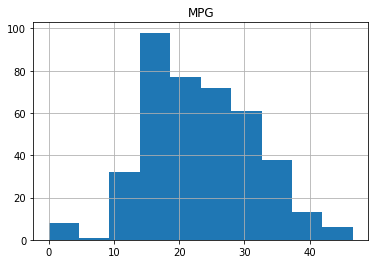

In [85]:
cars.hist(column='MPG')
plt.show()

Text(0.5, 0, 'Miles per gallon')

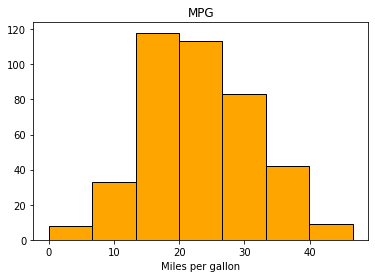

In [86]:
#Additional Arguments

cars.hist(column='MPG',
         grid=False,
         color = 'orange',
         edgecolor ='black',
         figsize=(6,4),
         bins=7)
plt.xlabel("Miles per gallon")

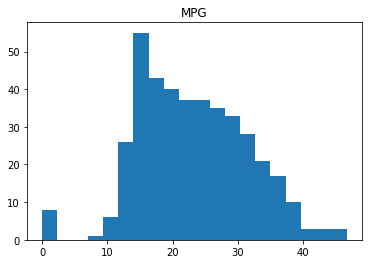

In [87]:
#Additional arguments: 
cars.hist(column='MPG',
         grid=False,
         figsize=(6,4),
         bins=20)
plt.show()


*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html*

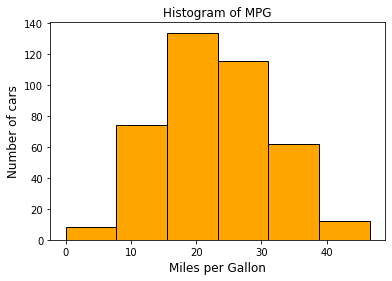

In [91]:
#Labelling the axes and giving the title
cars.hist(column="MPG",
          grid=False,
          figsize=(6,4),
          bins=6,
          color='orange',
          edgecolor='Black'
         )
plt.xlabel("Miles per Gallon",fontsize=12)
plt.ylabel("Number of cars",fontsize=12)
plt.title("Histogram of MPG",fontsize=12)
plt.show()


In [96]:
#Breaking up by the categories of a categorical variable

cars.bar(column='Origin',
          figsize=(6,4),
        )


AttributeError: 'DataFrame' object has no attribute 'bar'

#### 3B. Boxplots

<AxesSubplot:>

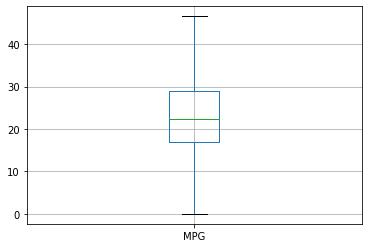

In [97]:
#Plotting a boxplot for the variable MPG
cars.boxplot(column = "MPG")
cars.boxplot

<AxesSubplot:>

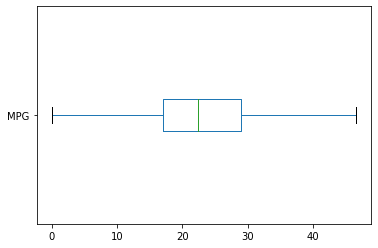

In [100]:
#Additional arguments (horizontal boxplot)

cars.boxplot(column="MPG",
            grid=False,
            vert=False)

*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html*

In [ ]:
#Labelling the boxplot



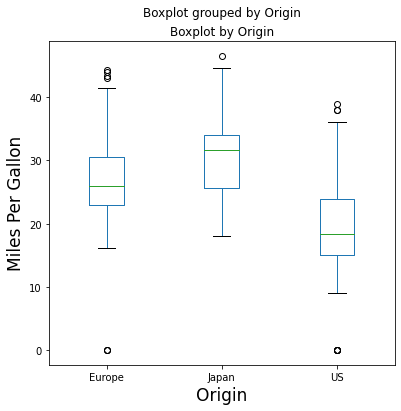

In [103]:
#Side by Side boxplot
cars.boxplot(column='MPG',
             by='Origin',
            grid=False,
            figsize=(6,6),
            )
plt.xlabel("Origin",fontsize=17)
plt.ylabel("Miles Per Gallon", fontsize=17)
plt.title("Boxplot by Origin")
plt.show()


Text(0, 0.5, 'Weight')

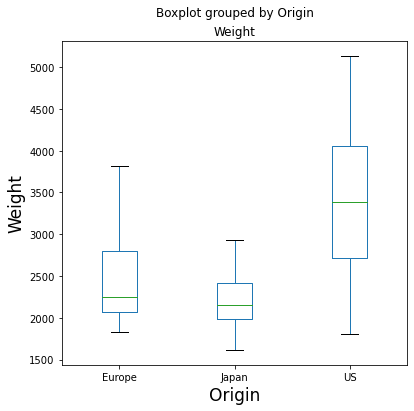

In [111]:
#The rotation argument
#Side by Side boxplot
cars.boxplot(column='Weight',
            by='Origin',
            figsize=(6,6),
            grid=False)
plt.xlabel("Origin",fontsize=17)
plt.ylabel("Weight",fontsize=17)


#### 3C. Bar Plots

In [8]:
import matplotlib.pyplot as plt

In [112]:
cars['Origin'].value_counts()

US        254
Japan      79
Europe     73
Name: Origin, dtype: int64

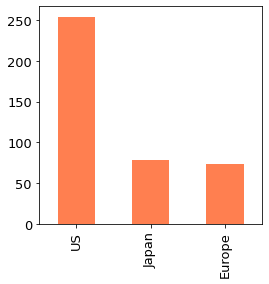

In [113]:
cars['Origin'].value_counts().plot(kind='bar', figsize=(4,4),
                                 color = "coral", fontsize = 13)
plt.show()

<AxesSubplot:>

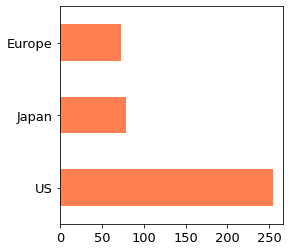

In [114]:
cars['Origin'].value_counts().plot(kind='barh', figsize=(4,4),
                                 color = "coral", fontsize = 13)

Study pandas.DataFrame.plot: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html 

#### 3D. Scatter Plots

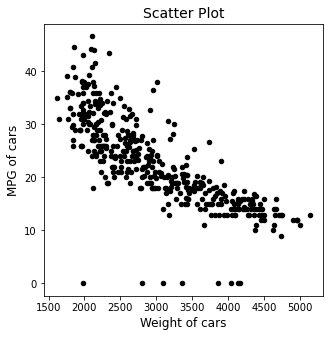

In [115]:
#Scatter plot 
cars.plot(kind = 'scatter',
         x = "Weight",
         y = "MPG",
         color = "black",
         figsize=(5,5))
plt.xlabel("Weight of cars",fontsize = 12)
plt.ylabel("MPG of cars",fontsize = 12)
plt.title("Scatter Plot", fontsize = 14)

plt.show()


*Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html*

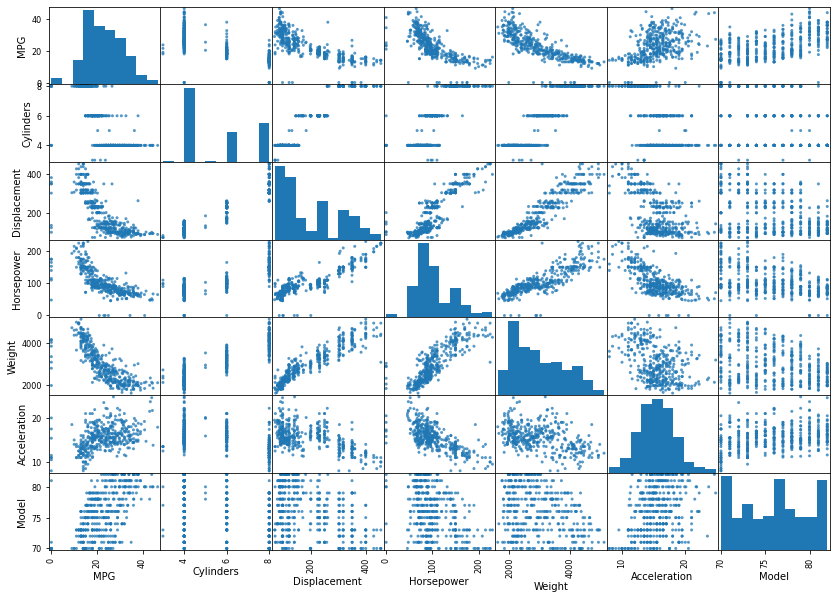

In [15]:
#Pairwise Scatterplot
from pandas.plotting import scatter_matrix
scatter_matrix(cars.drop(["Car","Origin"],axis = 1), alpha = 0.75, figsize = (14,10),
              diagonal = "hist")
plt.savefig('scatter.png')
plt.show()

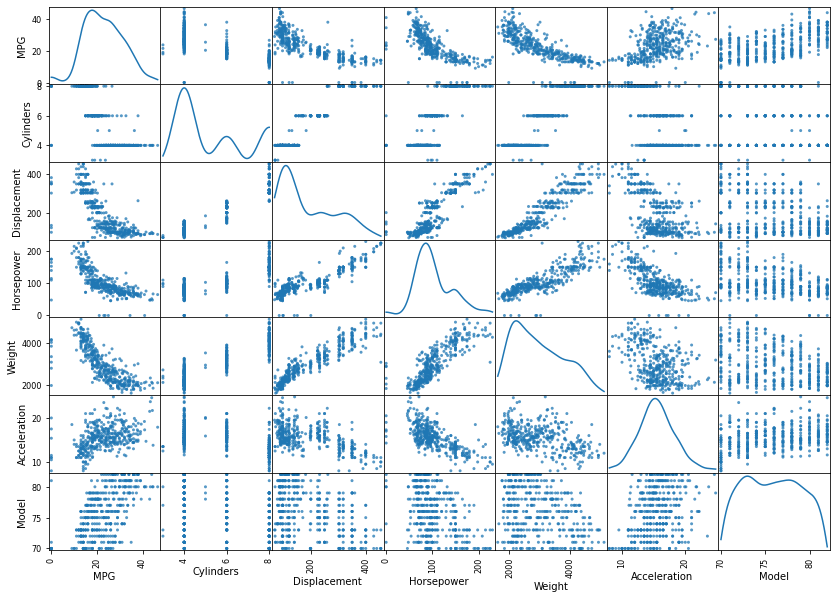

In [117]:
#Exporting Graph
from pandas.plotting import scatter_matrix

scatter_matrix(cars.drop(["Car","Origin"],axis=1),alpha=.75,figsize=(14,10),diagonal='kde')

plt.savefig('scatter.png')



## Part 2 - Data Manipulation

#### 1. Sorting

In [118]:
#Sort the data in ascending order of MPG
cars.sort_values("MPG").head(1)


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,MPG_Rate
13,Plymouth Satellite (sw),0.0,8,383.0,175,4166,10.5,70,US,Normal


In [119]:
#Sort the data in descending order of MPG
cars.sort_values("MPG", ascending=0).head(1)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,MPG_Rate
329,Mazda GLC,46.6,4,86.0,65,2110,17.9,80,Japan,Awesome


In [18]:
#Sort the data in descending order of Origin and then by increasing order of MPG
cars.sort_values(["Origin","MPG"],ascending=[0,1])[['Origin','MPG']]

,Origin,MPG
11,US,0.0
12,US,0.0
13,US,0.0
14,US,0.0
17,US,0.0
...,...,...
316,Europe,41.5
251,Europe,43.1
333,Europe,43.4
402,Europe,44.0


In [46]:
#Saving in another data frame
cars2= cars.sort_values(["Origin","MPG"], ascending = [0,1])[["Origin","MPG"]]
cars2= pd.DataFrame(cars2)

In [47]:
type(cars2)

pandas.core.frame.DataFrame

In [22]:
#Exporting data
cars2= cars.sort_values(["Origin","MPG"], ascending = [0,1])[["Origin","MPG"]]
cars2.to_csv("Sorted Cars data.csv")

#### 2. Variable Transformation

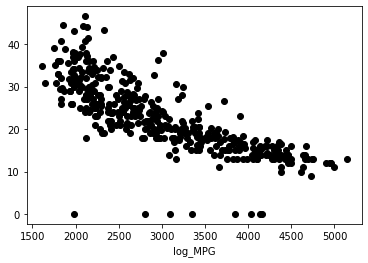

In [28]:
# Plot a scatter plot between MPG and weight. Comment of the linearity.
plt.scatter(cars.Weight,y = cars.MPG,color = "black")
plt.xlabel("log_Weight")
plt.xlabel("log_MPG")
plt.show()



In [26]:
import numpy as np

C:\Users\ROONASHREE\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


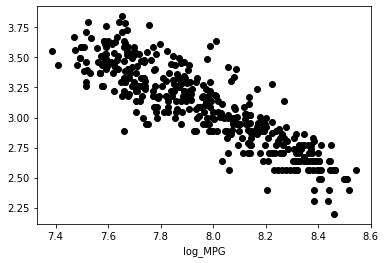

In [27]:
# Re-plot the scatter plot by taking the log transformation of both the variables. Does the linearity 
# Improve?

plt.scatter(np.log(cars.Weight),y=np.log(cars.MPG), color = "black")
plt.xlabel("log_Weight")
plt.xlabel("log_MPG")
plt.show()


In [32]:
cars.MPG.describe()

count    406.000000
mean      23.051232
std        8.401777
min        0.000000
25%       17.000000
50%       22.350000
75%       29.000000
max       46.600000
Name: MPG, dtype: float64

In [33]:
np.log(cars.MPG).describe()

count    406.000000
mean           -inf
std             NaN
min            -inf
25%        2.833213
50%        3.106824
75%        3.367296
max        3.841601
Name: MPG, dtype: float64

In [34]:
np.log(cars.MPG+1).describe()

count    406.000000
mean       3.085804
std        0.543030
min        0.000000
25%        2.890372
50%        3.150595
75%        3.401197
max        3.862833
Name: MPG, dtype: float64

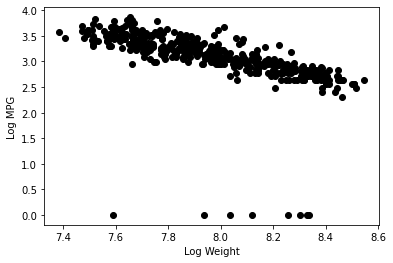

In [30]:
# But there is a problem! Check the summary of log(MPG). What do you observe?
plt.scatter(np.log(cars.Weight),y=np.log(cars.MPG+1),color="black")
plt.xlabel("Log Weight")
plt.ylabel("Log MPG")
plt.show()


In [ ]:
# Can you identify where we got misleaded? Probably the answer lies in the summary of MPG.
# How can we correct this?


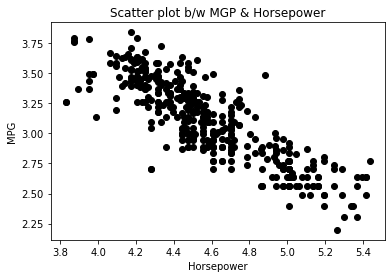

In [122]:
# Study the association between MPG and Horsepower. (Do Yourself)
plt.scatter(np.log(cars.Horsepower), y = np.log(cars.MPG), color = "black")
plt.ylabel("MPG")
plt.xlabel("Horsepower")
plt.title("Scatter plot b/w MGP & Horsepower")
plt.show()



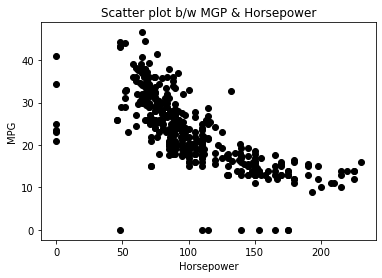

In [43]:
plt.scatter(cars.Horsepower, y = cars.MPG, color = "black")
plt.ylabel("MPG")
plt.xlabel("Horsepower")
plt.title("Scatter plot b/w MGP & Horsepower")
plt.show()

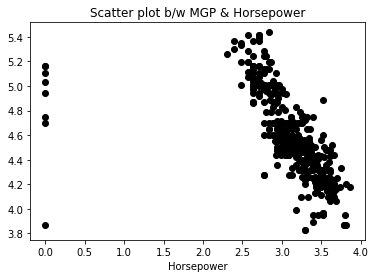

In [36]:
plt.scatter(np.log(cars.MPG+1), y = np.log(cars.), color = "black")
plt.xlabel("MPG")
plt.xlabel("Horsepower")Horsepower
plt.title("Scatter plot b/w MGP & Horsepower")
plt.show()

In [37]:
import statsmodels.api as stm

In [46]:
mod = stm.OLS(cars.Horsepower, cars.MPG).fit()
mod.


#### The np.where() function


In [ ]:
import numpy as np

In [51]:
# PROBLEM 1:
# Create a variable HP which will take only two values:
# IF Horsepower < 100 THEN "Low HP"
# IF Horsepower >= 100 THEN "High HP"
cars["HP"]= np.where(cars.Horsepower>=100,"High","Low")
cars.tail()





,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,HP
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US,Low
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe,Low
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US,Low
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US,Low
405,Chevy S-10,31.0,4,119.0,82,2720,19.4,82,US,Low


In [49]:
#PROBLEM 2:
# Create a Variable MPG_Rate which will take on the values as follows:
# IF MPG < 15 THEN "Normal"
# IF MPG >= 15 AND MPG <=25 THEN "GOOD"
# IF MPG >= 25 AND MPG <=35 THEN "GREAT"
# IF MPG >= 35 THEN "AWESOME"
cars["MPG_Rate"] =  np.where(cars.MPG<15,"Normal",
                             np.where(cars.MPG<=25,"Good",
                                     np.where(cars.MPG<=35,"Great","Awesome")))
cars.tail()




,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,MPG_Rate
401,Ford Mustang GL,27.0,4,140.0,86,2790,15.6,82,US,Great
402,Volkswagen Pickup,44.0,4,97.0,52,2130,24.6,82,Europe,Awesome
403,Dodge Rampage,32.0,4,135.0,84,2295,11.6,82,US,Great
404,Ford Ranger,28.0,4,120.0,79,2625,18.6,82,US,Great
405,Chevy S-10,31.0,4,119.0,82,2720,19.4,82,US,Great
